### Problema

Para empezar la empresa quiere investigar las diferencias clave entre los empleados que han dejado la organización y los que permanecen en ella. Para ello, nos han pedido que realicemos una serie de análisis los cuales tenemos descritos a continuación: 

1. ¿Existe una diferencia en la edad promedio entre los empleados que han dejado la empresa y los que no?

2. ¿Existe una diferencia en el ingreso mensual promedio entre empleados que han dejado la empresa y los que no?

3. ¿Existe una diferencia en la proporción de empleados que hacen horas extras entre los que han dejado la empresa y los que no?

4. ¿Existe una diferencia en los años promedio trabajados con el mismo gerente entre empleados que han dejado la empresa y los que no?

5. ¿Existe una diferencia en los años desde la última promoción entre los empleados que han dejado la empresa y los que no?

Basándonos en los resultados de los análisis anteriores, escribe aquellos factores que parecen estar más asociados con los empleados que han dejado la empresa en comparación con los que se han quedado.

Llegados a este punto, ya sabemos y hemos identificado algunos patrones importantes entre los empleados que han dejado la empresa y los que no. Investiguemos ahora que esta ocurriendo entre los empleados que han dejado la empresa a traves de las siguientes preguntas: 

- Analiza a los empleados que tienen más de 10 años de experiencia en la empresa y examina cómo varía su tasa de incremento salarial y sus horas estándar de trabajo según su nivel de satisfacción laboral y estado civil.

- Ahora deberéis focalizaros en los empleados casados que tienen una alta satisfacción con su entorno laboral y que pertenecen al departamento de `'Research & Development'`. Deberéis evaluar cómo varían el tiempo desde su última promoción y los años que han estado en su rol actual según su género.

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("datos_pandas/IBM_HR_Employee_Attrition_full.csv", index_col=0)

In [30]:
df.dtypes

DistanceFromHome              int64
Education                    object
EducationField               object
Gender                       object
MaritalStatus                object
Age                           int64
EmployeeId                   object
DateEmployment               object
YearsInCurrentRole            int64
YearsSinceLastPromotion       int64
YearsWithCurrManager          int64
TotalWorkingYears             int64
Over18                       object
NumCompaniesWorked          float64
Country                      object
Sons                          int64
Attrition                    object
BusinessTravel               object
DailyRate                   float64
Department                   object
EmployeeCount                 int64
HourlyRate                    int64
JobLevel                      int64
JobRole                      object
MonthlyIncome                 int64
MonthlyRate                   int64
OverTime                     object
PercentSalaryHike           

In [18]:
### Existe una diferencia de edad
df_frame1= df.groupby('Attrition')[['Age']].mean()
df_frame1

Age
Attrition OverTime           
No        No        37.130297
          Yes       38.968858
Yes       No        33.609091
          Yes       33.606299

In [26]:
df_frame2= df.groupby('Attrition')[['MonthlyIncome']].mean()
df_frame2

,MonthlyIncome
Attrition,
No,6832.739659
Yes,4787.092827


In [27]:
df.groupby('Attrition')[['MonthlyRate']].median() ### la conclusión es que los que se van cobran más que aquellos que se mantienen en la empresa


,MonthlyRate
Attrition,
No,14120.0
Yes,14618.0


In [73]:
df_frame_doble = df.groupby(['Attrition', 'OverTime'])[['EmployeeId']].count() 
df_frame_doble

EmployeeId
Attrition OverTime            
No        No               944
          Yes              289
Yes       No               110
          Yes              127

In [43]:
filas= df.shape[0]
filas

1470

In [77]:
df_frame3 = df.groupby(['Attrition'])[['OverTime']].count() 
df_frame3

,OverTime
Attrition,
No,1233
Yes,237


In [78]:
(df_frame3/filas)*100 ### Los que siguen trabajando son los que trabajan horas extras, en

,OverTime
Attrition,
No,83.877551
Yes,16.122449


In [44]:
df.head(2)

,DistanceFromHome,Education,EducationField,Gender,MaritalStatus,Age,EmployeeId,DateEmployment,YearsInCurrentRole,YearsSinceLastPromotion,...,OverTime,PercentSalaryHike,StandardHours,StockOptionLevel,TrainingTimesLastYear,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction
0,21,Bachelor,Other,Male,Single,19,70b8db40-4f58-476f-8776-c00802b0cdb9,2000-01-13 02:53:47,14,0,...,Yes,13,80.0,0,3,Very High,Medium,Medium,Excellent,Medium
1,25,College,Technical Degree,Female,Married,30,0722da7a-530b-41dd-b705-c79f7627f677,2000-01-17 03:53:10,16,0,...,Yes,12,80.0,1,2,Very High,High,High,Excellent,Medium


In [45]:
### Nos hemos dado cuenta de que los que aun permanecen en la empresa tienen más tiempo debajo de su manager, con una diferencia de casi 1 año
df_frame_manager= df.groupby('Attrition')[['YearsWithCurrManager']].mean() ### promedio de años de los que se van con los que no se van con el mismo manager
df_frame_manager

,YearsWithCurrManager
Attrition,
No,2.218978
Yes,1.379747


In [58]:
df.dtypes

DistanceFromHome              int64
Education                    object
EducationField               object
Gender                       object
MaritalStatus                object
Age                           int64
EmployeeId                   object
DateEmployment               object
YearsInCurrentRole            int64
YearsSinceLastPromotion       int64
YearsWithCurrManager          int64
TotalWorkingYears             int64
Over18                       object
NumCompaniesWorked          float64
Country                      object
Sons                          int64
Attrition                    object
BusinessTravel               object
DailyRate                   float64
Department                   object
EmployeeCount                 int64
HourlyRate                    int64
JobLevel                      int64
JobRole                      object
MonthlyIncome                 int64
MonthlyRate                   int64
OverTime                     object
PercentSalaryHike           

In [65]:
### Alta tasa de partida en un primer año
df_attrition_yes = df[df['Attrition'] == 'Yes']
df_attrition_yes.groupby('Attrition')[['YearsWithCurrManager']].value_counts().reset_index()

,Attrition,YearsWithCurrManager,count
0,Yes,0,119
1,Yes,1,47
2,Yes,2,30
3,Yes,5,9
4,Yes,6,9
5,Yes,4,8
6,Yes,3,6
7,Yes,7,4
8,Yes,8,4
9,Yes,11,1


In [69]:
df_attrition_no = df[df['Attrition'] == 'No']
df_attrition_no.groupby('Attrition')[['YearsWithCurrManager']].value_counts().reset_index()

,Attrition,YearsWithCurrManager,count
0,No,0,421
1,No,1,226
2,No,2,195
3,No,3,104
4,No,5,70
5,No,4,64
6,No,7,49
7,No,6,45
8,No,8,24
9,No,9,10


In [53]:


df_frame_manager_2= df_attrition_yes.groupby('Attrition')[['YearsWithCurrManager']].value_counts()
df_frame_manager_2.reset_index()

,Attrition,YearsWithCurrManager,count
0,No,0,421
1,No,1,226
2,No,2,195
3,No,3,104
4,No,5,70
5,No,4,64
6,No,7,49
7,No,6,45
8,No,8,24
9,No,9,10


In [67]:
df.columns

Index(['DistanceFromHome', 'Education', 'EducationField', 'Gender',
       'MaritalStatus', 'Age', 'EmployeeId', 'DateEmployment',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'TotalWorkingYears', 'Over18', 'NumCompaniesWorked', 'Country', 'Sons',
       'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'EmployeeCount', 'HourlyRate', 'JobLevel', 'JobRole', 'MonthlyIncome',
       'MonthlyRate', 'OverTime', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TrainingTimesLastYear', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobSatisfaction', 'PerformanceRating',
       'RelationshipSatisfaction'],
      dtype='object')

In [68]:

df_frame_promotion= df.groupby('Attrition')[['YearsSinceLastPromotion']].value_counts()
df_frame_promotion.reset_index()

,Attrition,YearsSinceLastPromotion,count
0,No,0,718
1,No,1,246
2,No,2,107
3,No,3,50
4,No,5,28
5,No,4,26
6,No,6,19
7,No,7,15
8,No,11,8
9,No,8,5


Visualizaciones: la edad realmente tiene un impacto para abandonar la empresa?

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\DELL\AppData\Local\Temp\ipykernel_12124\1067145919.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y = 'Attrition',


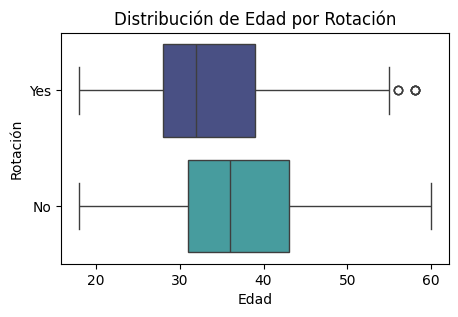

In [90]:
plt.figure(figsize= (5,3))
sns.boxplot(y = 'Attrition',
            x = 'Age',
            data= df,
            palette="mako");
plt.title('Distribución de Edad por Rotación', fontsize = 12)
plt.xlabel('Edad')
plt.ylabel('Rotación')
plt.show()

### la linea que corta es la mediana, linea de abajo es 25% y la de arriba es 75%. 
### Fuera del todo hay un valor atípico en e símbolo. Son valorea atípicos

Ingreso mensual: veamos la diferencia

C:\Users\DELL\AppData\Local\Temp\ipykernel_12124\3323567532.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'Attrition',


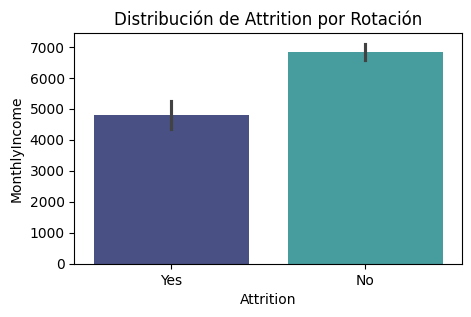

In [96]:
plt.figure(figsize=(5,3))
sns.barplot(x= 'Attrition',
            y = 'MonthlyIncome',
            data=df,
            palette='mako')
plt.title('Distribución de Attrition por Rotación', fontsize = 12)
plt.xlabel('Attrition')
plt.ylabel('MonthlyIncome')
plt.show()

### la raya del medio es el intervalo de confianza, al 95% por defecto (se cambia con ci=)
### nos muestra la media como tal, 
### se aplica una medida sobre la media

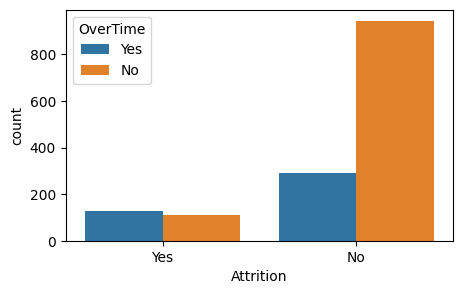

In [103]:
### Veamos los empleados que hacen horas extras, entre los que se quedaron y los que se fueron con satisfaccion laboral
plt.figure(figsize=(5,3))
sns.countplot(x = 'Attrition',
              hue= 'OverTime', ### me divide los niveles de la variable en x
              data= df); ### me pone el count value en porcentaje
# primero contamos y luego agrupamos
### countplot es usar un groupby con .count

C:\Users\DELL\AppData\Local\Temp\ipykernel_12124\3427612688.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'Attrition', y = 'MonthlyIncome', data=df, palette='mako', ax= axes[1])


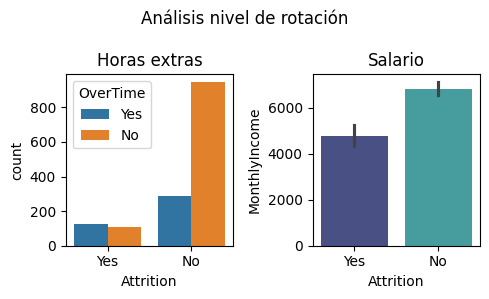

In [117]:
fig, axes = plt.subplots(1,2, figsize = (5,3)) ### creo el espacio para la comparación

sns.countplot(x = 'Attrition', hue= 'OverTime', data= df, ax = axes[0])
sns.barplot(x= 'Attrition', y = 'MonthlyIncome', data=df, palette='mako', ax= axes[1])
plt.title('Dos gráficas')
axes[0].set_title('Horas extras')
axes[1].set_title('Salario')
plt.suptitle('Análisis nivel de rotación')
plt.tight_layout(); ### coloca todo


<Axes: xlabel='Attrition', ylabel='count'>

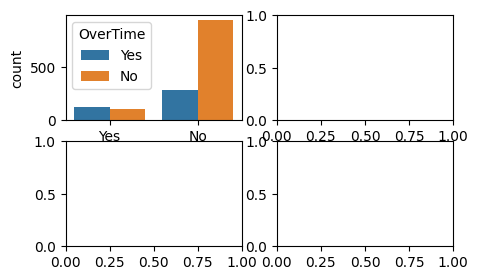

In [118]:
fig, axes = plt.subplots(2,2, figsize = (5,3)) ### creo el espacio para la comparación
sns.countplot(x = 'Attrition', hue= 'OverTime', data= df, ax = axes[0][0]) ### para colocar en 2x2. 2 columnas y 2 filas


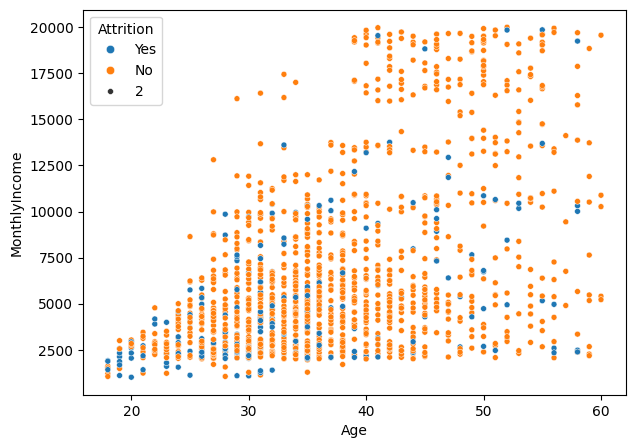

In [123]:
### para dos numéricas
plt.figure(figsize=(7,5))
sns.scatterplot(x= 'Age',
                y= 'MonthlyIncome',
                hue='Attrition', ### valores categóricos
                data=df,
                size=2);

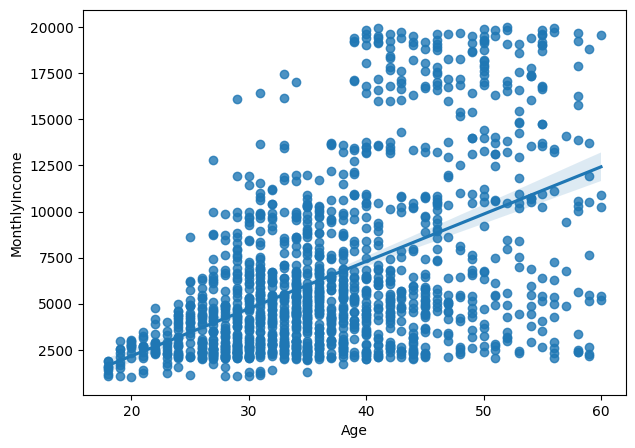

In [127]:
### para dos numéricas
plt.figure(figsize=(7,5))
sns.regplot(x= 'Age',
                y= 'MonthlyIncome',
                data=df);

In [135]:
df.columns

Index(['DistanceFromHome', 'Education', 'EducationField', 'Gender',
       'MaritalStatus', 'Age', 'EmployeeId', 'DateEmployment',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'TotalWorkingYears', 'Over18', 'NumCompaniesWorked', 'Country', 'Sons',
       'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'EmployeeCount', 'HourlyRate', 'JobLevel', 'JobRole', 'MonthlyIncome',
       'MonthlyRate', 'OverTime', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TrainingTimesLastYear', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobSatisfaction', 'PerformanceRating',
       'RelationshipSatisfaction'],
      dtype='object')

Debéis explorar si la satisfacción laboral esta relacionada con los salarios de los empleados.


C:\Users\DELL\AppData\Local\Temp\ipykernel_12124\2759668548.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y = 'MonthlyIncome',


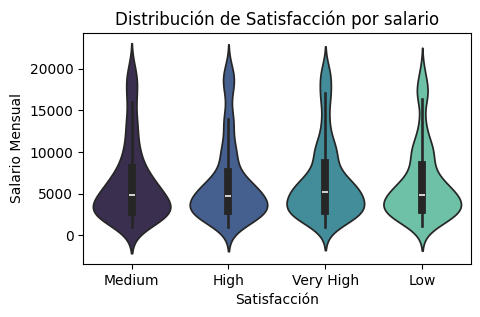

In [131]:


plt.figure(figsize= (5,3))
sns.violinplot(y = 'MonthlyIncome',
            x = 'JobSatisfaction',
            data= df,
            palette="mako");
plt.title('Distribución de Satisfacción por salario', fontsize = 12)
plt.xlabel('Satisfacción')
plt.ylabel('Salario Mensual')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12124\3915719449.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'MonthlyIncome',


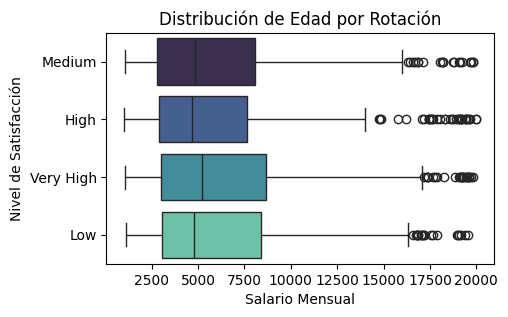

In [133]:
### Aquí tenemos la satisfacción laboral en base al salario
plt.figure(figsize= (5,3))
sns.boxplot(x = 'MonthlyIncome',
            y = 'JobSatisfaction',
            data= df,
            palette="mako");
plt.title('Distribución de Edad por Rotación', fontsize = 12)
plt.xlabel('Salario Mensual')
plt.ylabel('Nivel de Satisfacción')
plt.show()

Puedo observar que el nivel de satisfacción más alto es del grupo de aquellos que tienen mayor remuneración, con un tope más alto y valores atípicos en cantidad. sin embargo, el que tiene menor nivel de satisfacción se mantiene con ingresos similares a aquel con mayor satisfacción.

Deberéis examinar la relación entre la satisfacción laboral y el número de formaciones a lo largo del tiempo.

In [136]:
df.columns

Index(['DistanceFromHome', 'Education', 'EducationField', 'Gender',
       'MaritalStatus', 'Age', 'EmployeeId', 'DateEmployment',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'TotalWorkingYears', 'Over18', 'NumCompaniesWorked', 'Country', 'Sons',
       'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'EmployeeCount', 'HourlyRate', 'JobLevel', 'JobRole', 'MonthlyIncome',
       'MonthlyRate', 'OverTime', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TrainingTimesLastYear', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobSatisfaction', 'PerformanceRating',
       'RelationshipSatisfaction'],
      dtype='object')

In [141]:
df.head(1)

,DistanceFromHome,Education,EducationField,Gender,MaritalStatus,Age,EmployeeId,DateEmployment,YearsInCurrentRole,YearsSinceLastPromotion,...,OverTime,PercentSalaryHike,StandardHours,StockOptionLevel,TrainingTimesLastYear,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction
0,21,Bachelor,Other,Male,Single,19,70b8db40-4f58-476f-8776-c00802b0cdb9,2000-01-13 02:53:47,14,0,...,Yes,13,80.0,0,3,Very High,Medium,Medium,Excellent,Medium


In [143]:
df['year'] = df['DateEmployment'].dt.year
año = df['year']

0       2000
1       2000
2       2000
3       2000
4       2000
        ... 
1465    2022
1466    2022
1467    2022
1468    2022
1469    2022
Name: year, Length: 1470, dtype: int32

C:\Users\DELL\AppData\Local\Temp\ipykernel_12124\2927659439.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(y='TrainingTimesLastYear', x=df["DateEmployment"].dt.year, data=df, hue='JobSatisfaction', style=None, size=None, markers=True, estimator='mean', ci=95, err_style='band')


<Axes: xlabel='DateEmployment', ylabel='TrainingTimesLastYear'>

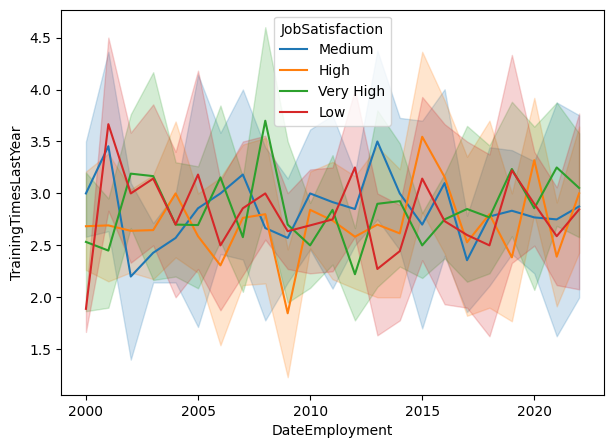

In [145]:
### para dos numéricas
plt.figure(figsize=(7,5))
sns.lineplot(y='TrainingTimesLastYear', x=df["DateEmployment"].dt.year, data=df, hue='JobSatisfaction', style=None, size=None, markers='o', estimator='mean', ci=95, err_style='band')

In [151]:
df_filtrado = df[df['JobSatisfaction'].isin(['High', 'Low'])]
df_filtrado.head(1)

,DistanceFromHome,Education,EducationField,Gender,MaritalStatus,Age,EmployeeId,DateEmployment,YearsInCurrentRole,YearsSinceLastPromotion,...,PercentSalaryHike,StandardHours,StockOptionLevel,TrainingTimesLastYear,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,year
1,25,College,Technical Degree,Female,Married,30,0722da7a-530b-41dd-b705-c79f7627f677,2000-01-17 03:53:10,16,0,...,12,80.0,1,2,Very High,High,High,Excellent,Medium,2000


C:\Users\DELL\AppData\Local\Temp\ipykernel_12124\3867330143.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(y='TrainingTimesLastYear', x=df["DateEmployment"].dt.year, data=df_filtrado, hue='JobSatisfaction', style=None, size=None, markers='o', estimator='mean', ci=95, err_style='band')


<Axes: xlabel='DateEmployment', ylabel='TrainingTimesLastYear'>

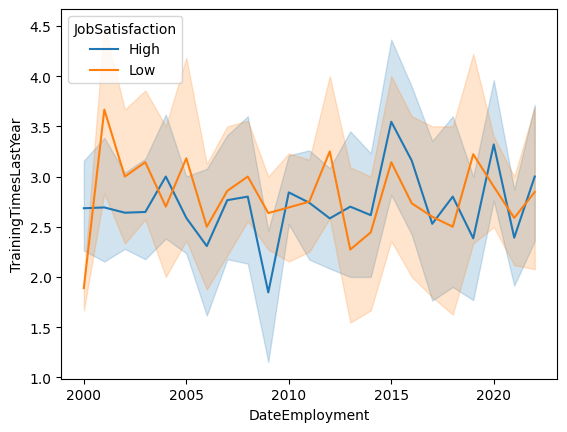

In [152]:
sns.lineplot(y='TrainingTimesLastYear', x=df["DateEmployment"].dt.year, data=df_filtrado, hue='JobSatisfaction', style=None, size=None, markers='o', estimator='mean', ci=95, err_style='band')

C:\Users\DELL\AppData\Local\Temp\ipykernel_12124\1457447331.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(y='TrainingTimesLastYear', x=df["DateEmployment"].dt.year, data=df, hue='JobSatisfaction', style=None, size=None, markers='o', estimator='mean', ci=95, err_style='band',  ax = axes[0])
C:\Users\DELL\AppData\Local\Temp\ipykernel_12124\1457447331.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'MonthlyIncome', y = 'JobSatisfaction', data= df, palette="mako", ax=axes[1]);


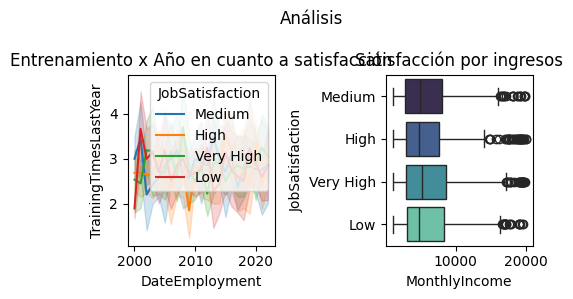

In [169]:
fig, axes = plt.subplots(1,2, figsize = (5,3)) ### creo el espacio para la comparación

sns.lineplot(y='TrainingTimesLastYear', x=df["DateEmployment"].dt.year, data=df, hue='JobSatisfaction', style=None, size=None, markers='o', estimator='mean', ci=95, err_style='band',  ax = axes[0])
sns.boxplot(x = 'MonthlyIncome', y = 'JobSatisfaction', data= df, palette="mako", ax=axes[1]);
plt.title('Dos gráficas')
axes[0].set_title('Entrenamiento x Año en cuanto a satisfacción')
axes[1].set_title('Satisfacción por ingresos')
plt.suptitle('Análisis')
plt.tight_layout(); ### coloca todo

In [160]:
df['Gender'].value_counts(normalize=True) *100

Gender
Male      60.0
Female    40.0
Name: proportion, dtype: float64

In [155]:
#### La proporción de empleados por género es un factor importante para analizar la diversidad dentro de la empresa. En esta gráfica, visualizaremos la distribución de empleados masculinos y femeninos, lo que nos permitirá observar si hay equilibrio entre ambos géneros dentro de la compañía.
df_genero = df.groupby("Gender")["EmployeeId"].count().reset_index()
display(df_genero)

,Gender,EmployeeId
0,Female,588
1,Male,882


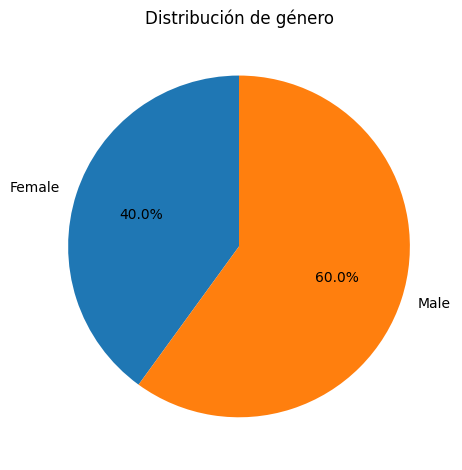

In [167]:
plt.pie("EmployeeId", labels= "Gender",
        data = df_genero, 
        autopct=  '%1.1f%%', 
        colors = None, 
        textprops={'fontsize': 10}, 
        startangle=90)
plt.title('Distribución de género')
plt.tight_layout(); ### coloca todo